# Exercise 1 - ICP

In this exercise you will implement the ICP algorithm for a small 2D example dataset. 

## 1.1 ICP with given correspondences [5]

Implement ICP if the point correspondences are given. 
A starting point for this exercise is given as follows. 

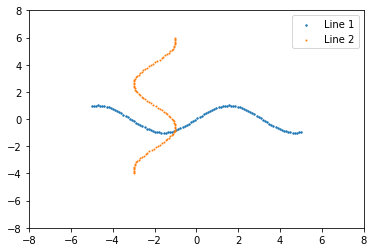

In [1]:
import ex1 as ex
import numpy as np
import matplotlib.pyplot as plt

Data = np.load('icp_data.npz')
Line1 = Data['LineGroundTruth']
Line2 = Data['LineMovedCorresp']
    
# Show the initial positions of the lines
ex.show_figure(Line1, Line2)

Following the missing parts in the algorithm, you will need to: 
  - compute mean point of an array of points in function **compute_mean()**;
  - compute cross covariance matrix **W** in **function compute_W()**;
  - compute estimated rotation and translation via **SVD** in function **compute_R_t()**;
  - apply the estimated rotation and translation and find the value of the squared error function to discover how good the estimated positions are in function **compute_error()**;
  - complete the fuction **icp_known_corresp()**.

Refer to the lecture slides for all the details. 

After you have implemented all the above, you should run the following code correctly and get the aligned Line1 and Line2.

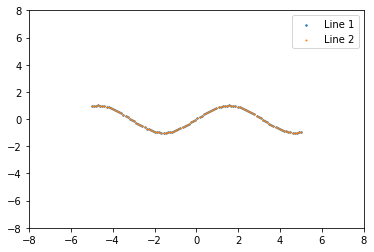

Error value is:  1.6764498e-28


In [2]:
# We assume that the there are 1 to 1 correspondences for this data
QInd = np.arange(len(Line1[0]))
PInd = np.arange(len(Line2[0]))

# Perform icp given the correspondences
[Line2, E] = ex.icp_known_corresp(Line1, Line2, QInd, PInd)

# Show the adjusted positions of the lines
ex.show_figure(Line1, Line2)

# print the error
print('Error value is: ', E)

## 1.2 ICP without given correspondences [5]

Use the result of your code from the first question, to implement the full ICP algorithm.

When the point correspondences are not available. You will need to iteratively find the point correspondences and using these perform the ICP updates. 

A starting point for this exercise is given as follows.

Make you algorithm stop after convergence. 

**Hint:** The **NearestNeighbors** functions of **sklearn** library can be useful in this task.

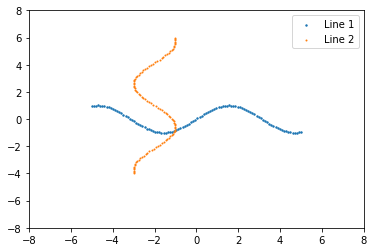

Final Error Value at 13 iteration is:  0.3678961


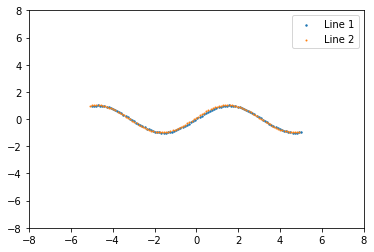

In [3]:
import numpy as np
from sklearn.neighbors import KDTree

Data = np.load('icp_data.npz')
Line1 = Data['LineGroundTruth']
Line2 = Data['LineMovedNoCorresp']

MaxIter = 100
Epsilon = 0.001
E = np.inf
# To find correspondences we use the Kd tree approach 
# The algorithm requires training data in dimension of  (samples x features)
#  We train on Line 1 and then query the model over line 2 to get correspondences
tree = KDTree(Line1.T)              
dist, ind = tree.query(Line1.T)                


# show figure
ex.show_figure(Line1, Line2)
    
for i in range(MaxIter):

    # TODO: find correspondences of points
    # point with index QInd(1, k) from Line1 corresponds to
    # point with index PInd(1, k) from Line2
    
    QInd = np.array([i[0] for i in tree.query(Line2.T, return_distance=False)])

    PInd = np.arange(len(Line2[0]))

    # update Line2 and error
    # Now that you know the correspondences, use your implementation
    # of icp with known correspondences and perform an update
    EOld = E
    [Line2, E] = ex.icp_known_corresp(Line1, Line2, QInd, PInd)
    # if i%10 == 0:
        # Uncomment for debugging     
        # print('Error value on ' + str(i) + ' iteration is: ', E)
        # ex.show_figure(Line1, Line2)

    # TODO: perform the check if we need to stop iterating
    if EOld - E <Epsilon :
        break

print('Final Error Value at ' + str(i) + ' iteration is: ', E)
ex.show_figure(Line1, Line2)